# Pattern Recognition HW2

# Neural Network

In [2]:
from neural_network import *

In [3]:
time.time()
RANDOM_SEED = 777

random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
Path("./neural_network").mkdir(parents=True, exist_ok=True)

## Dataset

In [4]:
"""
Generate Dataset
"""
dataset = fetch_california_housing()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
data = df.iloc[:, :13].values
label = df['target'].values
features = df.columns
train_X, test_X, train_y, test_y = train_test_split(data, label, test_size=0.20, shuffle=True)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.25, shuffle=True)

In [263]:
"""
Dataset Analysis
"""
statistic_dict = dataset_statistic(df=df, is_saved=True)
statistic_dict

{'MedInc': {'count': 20640,
  'mean': 3.8706710029069766,
  'std': 1.8997756945748738,
  'min': 0.4999,
  'max': 15.0001,
  'median': 3.5347999999999997,
  'per_25': 2.5633999999999997,
  'per_50': 3.5347999999999997,
  'per_75': 4.74325},
 'HouseAge': {'count': 20640,
  'mean': 28.639486434108527,
  'std': 12.585252725724606,
  'min': 1.0,
  'max': 52.0,
  'median': 29.0,
  'per_25': 18.0,
  'per_50': 29.0,
  'per_75': 37.0},
 'AveRooms': {'count': 20640,
  'mean': 5.428999742190376,
  'std': 2.474113202333516,
  'min': 0.8461538461538461,
  'max': 141.9090909090909,
  'median': 5.229128787878788,
  'per_25': 4.440716235896959,
  'per_50': 5.229128787878788,
  'per_75': 6.052380952380952},
 'AveBedrms': {'count': 20640,
  'mean': 1.096675149606208,
  'std': 0.47389937625774475,
  'min': 0.3333333333333333,
  'max': 34.06666666666667,
  'median': 1.048780487804878,
  'per_25': 1.006079046038478,
  'per_50': 1.048780487804878,
  'per_75': 1.099526066350711},
 'Population': {'count': 206

## Experiments of Activation Functions & Loss Functions

 === MAE Loss === 
> Sigmoid
- Last Epoch
Training - Loss : 0.9416356437609935
Validation - Loss : 0.9757162433696805
Testing - Loss : 0.9398449471066186


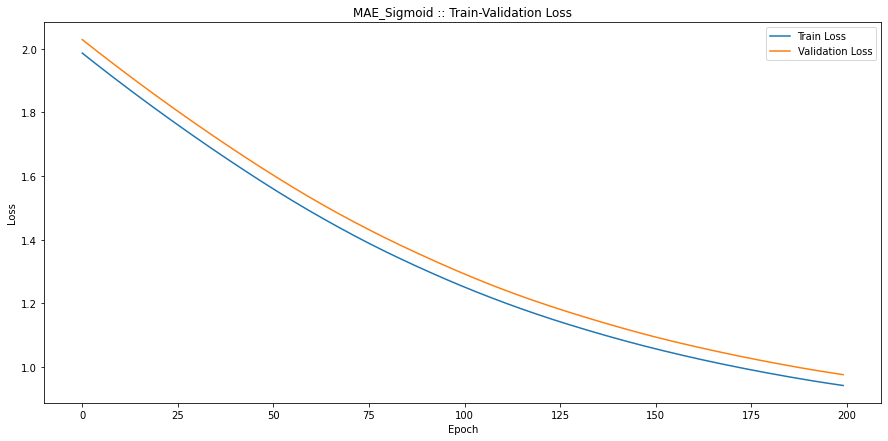

In [38]:
print(" === MAE Loss === ")
print("> Sigmoid")
model = MultiLayerPerceptron(loss_function=MAELoss, learning_rate=1e-5, layers=[
    DenseLayer(9, 16, Sigmoid, name="Layer_0"),
    DenseLayer(16, 8, Sigmoid, name="Layer_1"),
    DenseLayer(8, 1, Sigmoid, name="Layer_2"),
    DenseLayer(1, 1, Identity, name="Identity")
])
train_result_dict = train(model=model, train_X=train_X, train_y=train_y, val_X=val_X, val_y=val_y, batch_size=32, n_epoch=200)
test_result_dict = test(model=model, test_X=test_X, test_y=test_y, batch_size=32)
plot_result(train_result_dict=train_result_dict, model_name="MAE_Sigmoid", is_saved=True)

> ReLU
- Last Epoch
Training - Loss : 0.8814606936070255
Validation - Loss : 0.9058298774581879
Testing - Loss : 0.8730165911078293


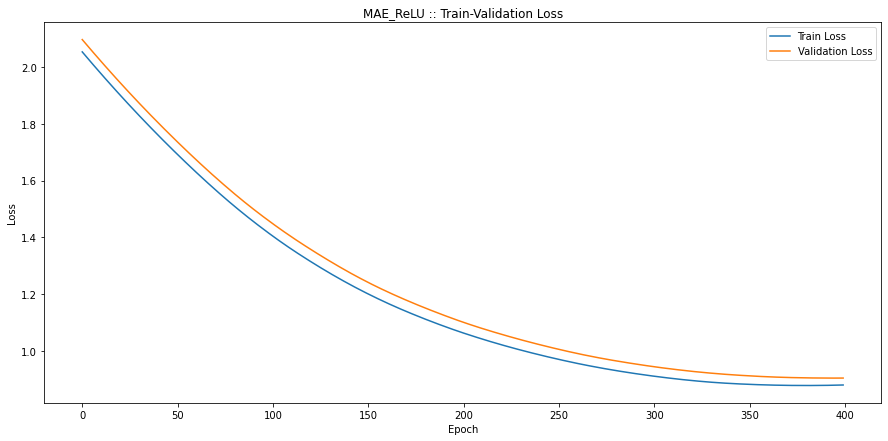

In [36]:
print("> ReLU")
model = MultiLayerPerceptron(loss_function=MAELoss, learning_rate=1e-5, layers=[
    DenseLayer(9, 16, ReLU, name="Layer_0"),
    DenseLayer(16, 8, ReLU, name="Layer_1"),
    DenseLayer(8, 1, ReLU, name="Layer_2"),
    DenseLayer(1, 1, Identity, name="Identity")
])
train_result_dict = train(model=model, train_X=train_X, train_y=train_y, val_X=val_X, val_y=val_y, batch_size=32, n_epoch=400)
test_result_dict = test(model=model, test_X=test_X, test_y=test_y, batch_size=32)
plot_result(train_result_dict=train_result_dict, model_name="MAE_ReLU", is_saved=True)

> Tanh
- Last Epoch
Training - Loss : 0.8876679789439414
Validation - Loss : 0.9183685802139955
Testing - Loss : 0.8817802933001362


D:\대학원\2021_01\패턴인식\2021-Pattern-Recognition\2_Assignment\HW2\neural_network.py:127: RuntimeWarning: overflow encountered in exp
  f = 2. * (1. / (1. + np.exp(-x))) - 1


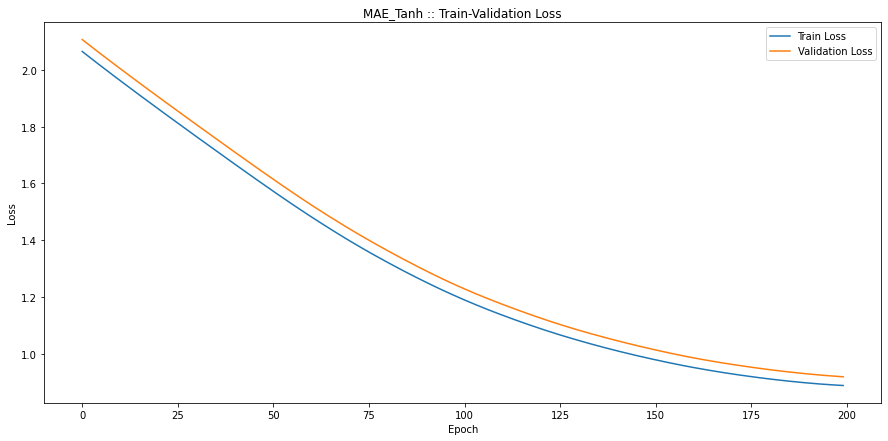

In [72]:
print("> Tanh")
model = MultiLayerPerceptron(loss_function=MAELoss, learning_rate=1e-5, layers=[
    DenseLayer(9, 16, Tanh, name="Layer_0"),
    DenseLayer(16, 8, Tanh, name="Layer_1"),
    DenseLayer(8, 1, Tanh, name="Layer_2"),
    DenseLayer(1, 1, Identity, name="Identity")
])
train_result_dict = train(model=model, train_X=train_X, train_y=train_y, val_X=val_X, val_y=val_y, batch_size=32, n_epoch=200)
test_result_dict = test(model=model, test_X=test_X, test_y=test_y, batch_size=32)
plot_result(train_result_dict=train_result_dict, model_name="MAE_Tanh", is_saved=True)

> Identity
- Last Epoch
Training - Loss : 11.086661705825579
Validation - Loss : 11.131328108442094
Testing - Loss : 10.87522943459299


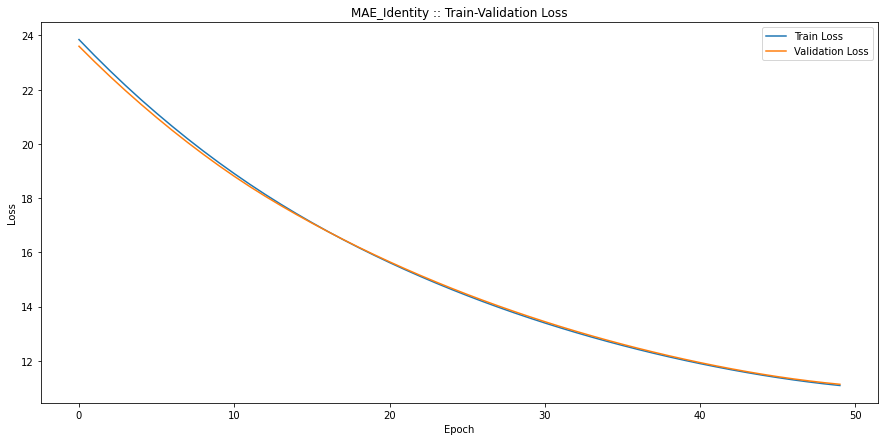

In [105]:
print("> Identity")
model = MultiLayerPerceptron(loss_function=MAELoss, learning_rate=1e-11, layers=[
    DenseLayer(9, 16, Identity, name="Layer_0"),
    DenseLayer(16, 8, Identity, name="Layer_1"),
    DenseLayer(8, 1, Identity, name="Layer_2")
])
train_result_dict = train(model=model, train_X=train_X, train_y=train_y, val_X=val_X, val_y=val_y, batch_size=32, n_epoch=50)
test_result_dict = test(model=model, test_X=test_X, test_y=test_y, batch_size=32)
plot_result(train_result_dict=train_result_dict, model_name="MAE_Identity", is_saved=True)

 === MSE Loss === 
> Sigmoid
- Last Epoch
Training - Loss : 1.3279555983442066
Validation - Loss : 1.3859863845393705
Testing - Loss : 1.289397966264814


D:\대학원\2021_01\패턴인식\2021-Pattern-Recognition\2_Assignment\HW2\neural_network.py:63: RuntimeWarning: overflow encountered in exp
  f = 1 / (1 + np.exp(-x))


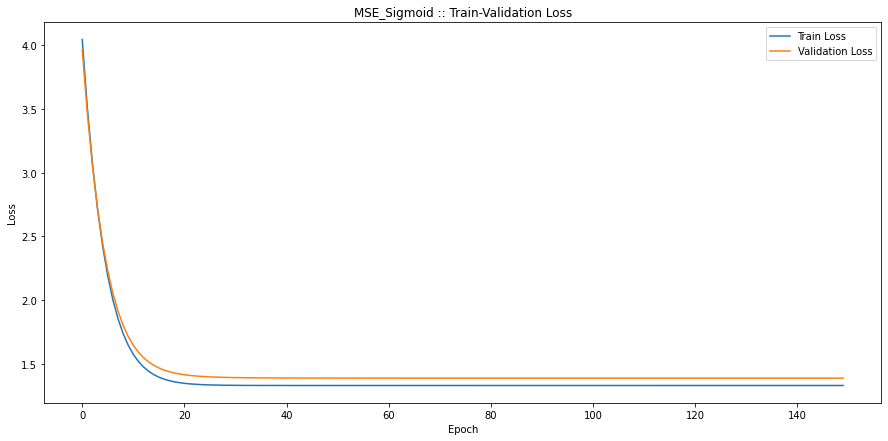

In [109]:
print(" === MSE Loss === ")
print("> Sigmoid")
model = MultiLayerPerceptron(loss_function=MSELoss, learning_rate=1e-4, layers=[
    DenseLayer(9, 16, Sigmoid, name="Layer_0"),
    DenseLayer(16, 8, Sigmoid, name="Layer_1"),
    DenseLayer(8, 1, Sigmoid, name="Layer_2"),
    DenseLayer(1, 1, Identity, name="Identity")
])
train_result_dict = train(model=model, train_X=train_X, train_y=train_y, val_X=val_X, val_y=val_y, batch_size=32, n_epoch=150)
test_result_dict = test(model=model, test_X=test_X, test_y=test_y, batch_size=32)
plot_result(train_result_dict=train_result_dict, model_name="MSE_Sigmoid", is_saved=True)

> ReLU
- Last Epoch
Training - Loss : 1.5221069919098902
Validation - Loss : 1.61761128796661
Testing - Loss : 1.4967132552495406


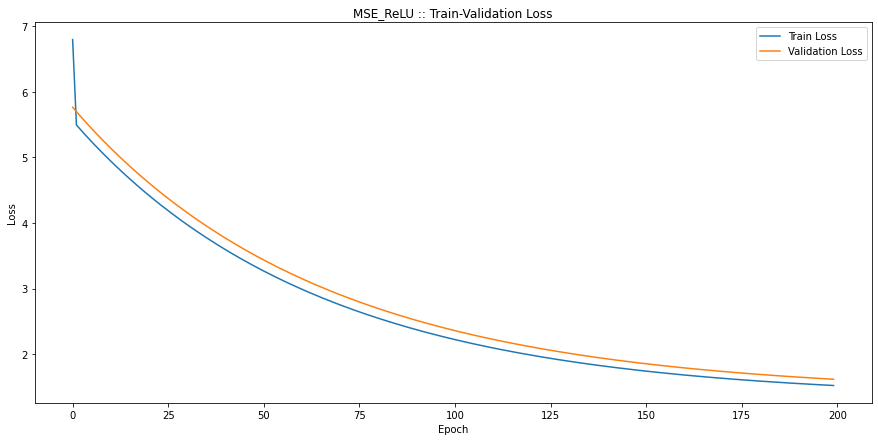

In [114]:
print("> ReLU")
model = MultiLayerPerceptron(loss_function=MSELoss, learning_rate=1e-5, layers=[
    DenseLayer(9, 16, ReLU, name="Layer_0"),
    DenseLayer(16, 8, ReLU, name="Layer_1"),
    DenseLayer(8, 1, ReLU, name="Layer_2"),
    DenseLayer(1, 1, Identity, name="Identity")
])
train_result_dict = train(model=model, train_X=train_X, train_y=train_y, val_X=val_X, val_y=val_y, batch_size=32, n_epoch=200)
test_result_dict = test(model=model, test_X=test_X, test_y=test_y, batch_size=32)
plot_result(train_result_dict=train_result_dict, model_name="MSE_ReLU", is_saved=True)

> Tanh
- Last Epoch
Training - Loss : 1.3307076772457247
Validation - Loss : 1.3887889858504647
Testing - Loss : 1.2915765499477276


D:\대학원\2021_01\패턴인식\2021-Pattern-Recognition\2_Assignment\HW2\neural_network.py:127: RuntimeWarning: overflow encountered in exp
  f = 2. * (1. / (1. + np.exp(-x))) - 1


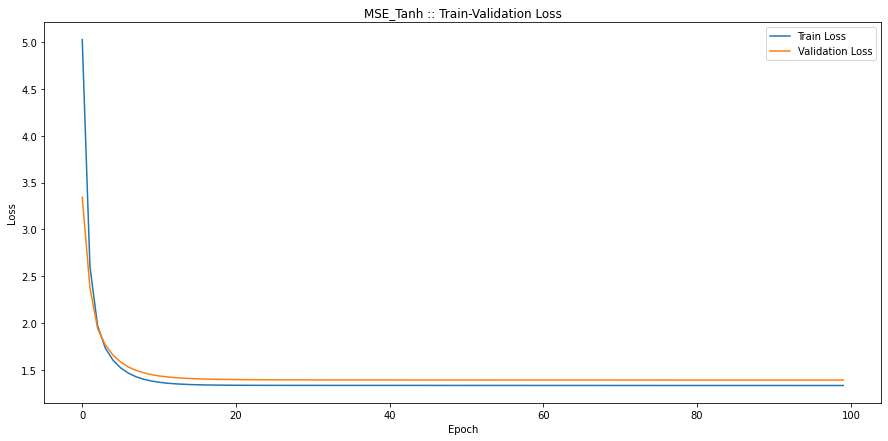

In [111]:
print("> Tanh")
model = MultiLayerPerceptron(loss_function=MSELoss, learning_rate=1e-4, layers=[
    DenseLayer(9, 16, Tanh, name="Layer_0"),
    DenseLayer(16, 8, Tanh, name="Layer_1"),
    DenseLayer(8, 1, Tanh, name="Layer_2"),
    DenseLayer(1, 1, Identity, name="Identity")
])
train_result_dict = train(model=model, train_X=train_X, train_y=train_y, val_X=val_X, val_y=val_y, batch_size=32, n_epoch=100)
test_result_dict = test(model=model, test_X=test_X, test_y=test_y, batch_size=32)
plot_result(train_result_dict=train_result_dict, model_name="MSE_Tanh", is_saved=True)

> Identity
- Last Epoch
Training - Loss : 93.99820649022499
Validation - Loss : 91.97862067709393
Testing - Loss : 87.57757899157313


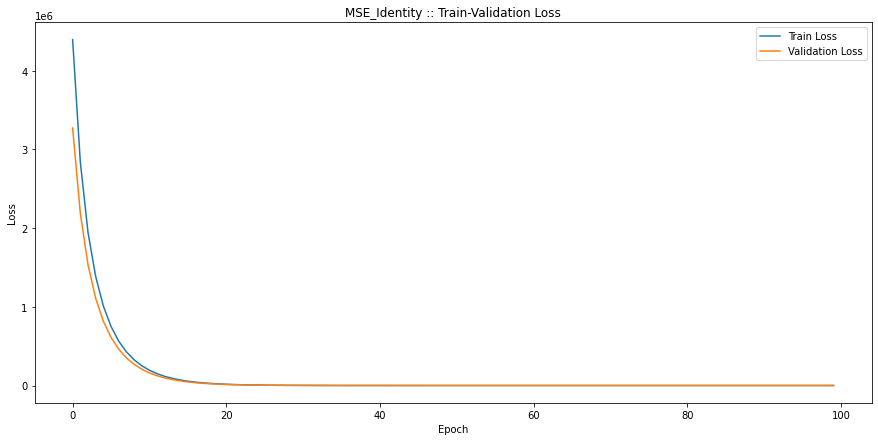

In [115]:
print("> Identity")
model = MultiLayerPerceptron(loss_function=MSELoss, learning_rate=1e-11, layers=[
    DenseLayer(9, 16, Identity, name="Layer_0"),
    DenseLayer(16, 8, Identity, name="Layer_1"),
    DenseLayer(8, 1, Identity, name="Layer_2"),
    DenseLayer(1, 1, Identity, name="Identity")
])
train_result_dict = train(model=model, train_X=train_X, train_y=train_y, val_X=val_X, val_y=val_y, batch_size=32, n_epoch=100)
test_result_dict = test(model=model, test_X=test_X, test_y=test_y, batch_size=32)
plot_result(train_result_dict=train_result_dict, model_name="MSE_Identity", is_saved=True)

 === RMSE Loss === 
> Sigmoid
- Last Epoch
Training - Loss : 1.196368913953998
Validation - Loss : 1.2346645335828115
Testing - Loss : 1.2029329754682552


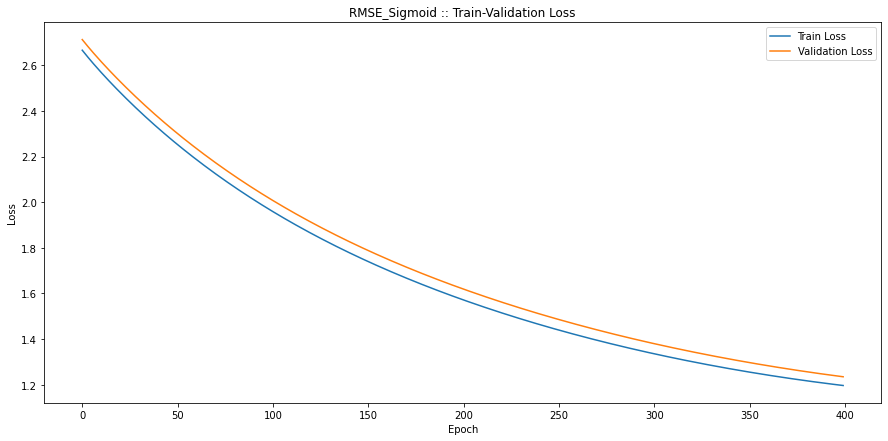

In [151]:
print(" === RMSE Loss === ")
print("> Sigmoid")
model = MultiLayerPerceptron(loss_function=RMSELoss, learning_rate=1e-6, layers=[
    DenseLayer(9, 16, Sigmoid, name="Layer_0"),
    DenseLayer(16, 8, Sigmoid, name="Layer_1"),
    DenseLayer(8, 1, Sigmoid, name="Layer_2"),
    DenseLayer(1, 1, Identity, name="Identity")
])
train_result_dict = train(model=model, train_X=train_X, train_y=train_y, val_X=val_X, val_y=val_y, batch_size=16, n_epoch=400)
test_result_dict = test(model=model, test_X=test_X, test_y=test_y, batch_size=32)
plot_result(train_result_dict=train_result_dict, model_name="RMSE_Sigmoid", is_saved=True)

> ReLU
- Last Epoch
Training - Loss : 1.1421376834901793
Validation - Loss : 1.1666498843265825
Testing - Loss : 1.1253157685400441


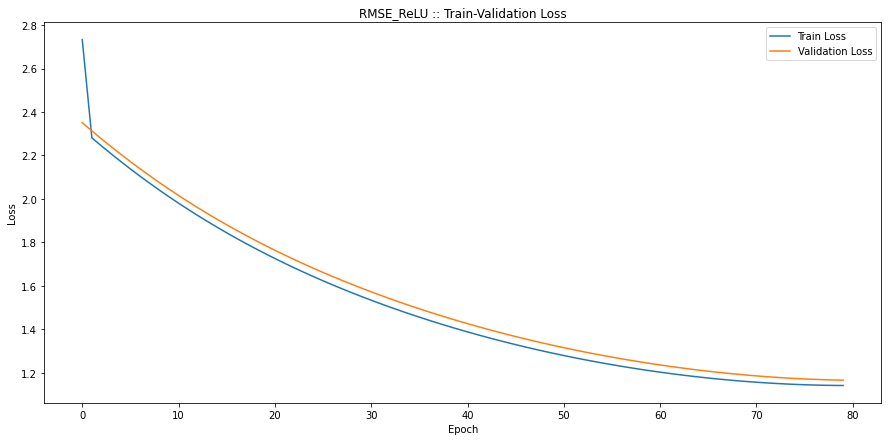

In [168]:
print("> ReLU")
model = MultiLayerPerceptron(loss_function=RMSELoss, learning_rate=1e-5, layers=[
    DenseLayer(9, 16, ReLU, name="Layer_0"),
    DenseLayer(16, 8, ReLU, name="Layer_1"),
    DenseLayer(8, 1, ReLU, name="Layer_2"),
    DenseLayer(1, 1, Identity, name="Identity")
])
train_result_dict = train(model=model, train_X=train_X, train_y=train_y, val_X=val_X, val_y=val_y, batch_size=32, n_epoch=80)
test_result_dict = test(model=model, test_X=test_X, test_y=test_y, batch_size=32)
plot_result(train_result_dict=train_result_dict, model_name="RMSE_ReLU", is_saved=True)

> Tanh
- Last Epoch
Training - Loss : 1.1492950780979216
Validation - Loss : 1.1690851444395687
Testing - Loss : 1.1310452230994215


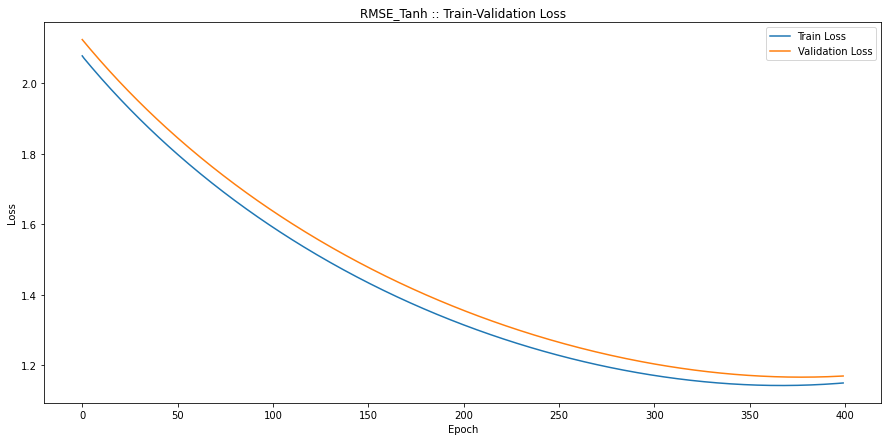

In [169]:
print("> Tanh")
model = MultiLayerPerceptron(loss_function=RMSELoss, learning_rate=1e-6, layers=[
    DenseLayer(9, 16, Tanh, name="Layer_0"),
    DenseLayer(16, 8, Tanh, name="Layer_1"),
    DenseLayer(8, 1, Tanh, name="Layer_2"),
    DenseLayer(1, 1, Identity, name="Identity")
])
train_result_dict = train(model=model, train_X=train_X, train_y=train_y, val_X=val_X, val_y=val_y, batch_size=32, n_epoch=400)
test_result_dict = test(model=model, test_X=test_X, test_y=test_y, batch_size=32)
plot_result(train_result_dict=train_result_dict, model_name="RMSE_Tanh", is_saved=True)

> Identity
- Last Epoch
Training - Loss : 47.84250615016689
Validation - Loss : 47.00083615635744
Testing - Loss : 47.81105742813913


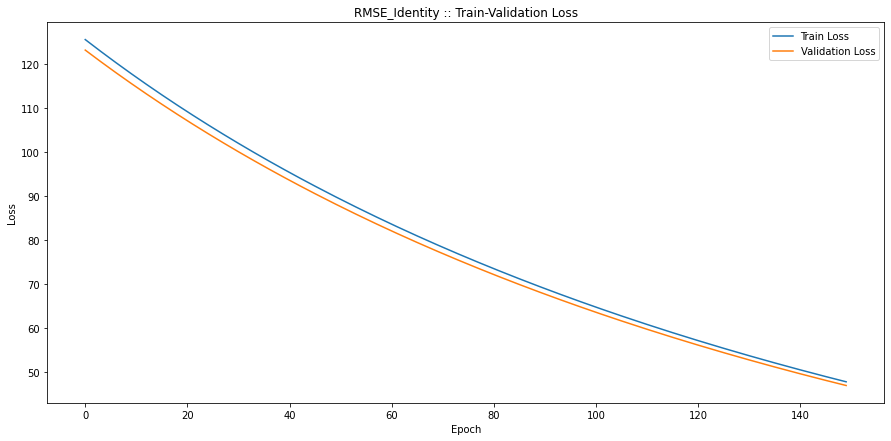

In [171]:
print("> Identity")
model = MultiLayerPerceptron(loss_function=RMSELoss, learning_rate=1e-12, layers=[
    DenseLayer(9, 16, Identity, name="Layer_0"),
    DenseLayer(16, 8, Identity, name="Layer_1"),
    DenseLayer(8, 1, Identity, name="Layer_2"),
    DenseLayer(1, 1, Identity, name="Identity")
])
train_result_dict = train(model=model, train_X=train_X, train_y=train_y, val_X=val_X, val_y=val_y, batch_size=16, n_epoch=150)
test_result_dict = test(model=model, test_X=test_X, test_y=test_y, batch_size=32)
plot_result(train_result_dict=train_result_dict, model_name="RMSE_Identity", is_saved=True)

 === MAPE Loss === 
> Sigmoid
- Last Epoch
Training - Loss : 46.30208676732608
Validation - Loss : 46.38027081472796
Testing - Loss : 45.52119043561883


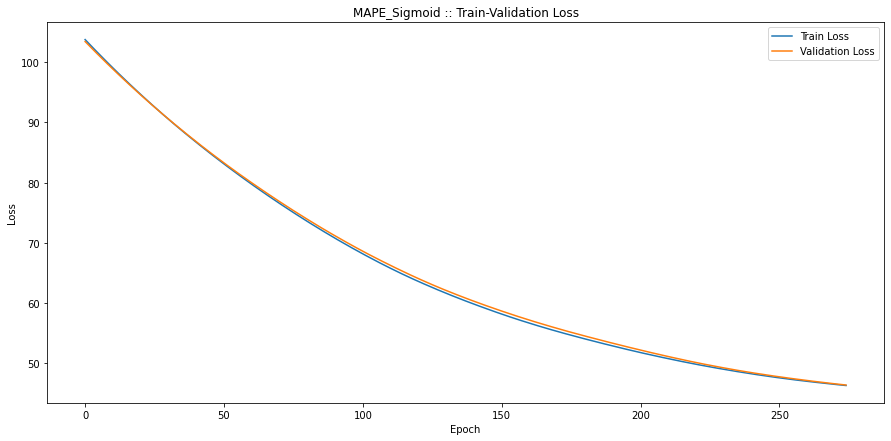

In [223]:
print(" === MAPE Loss === ")
print("> Sigmoid")
model = MultiLayerPerceptron(loss_function=MAPELoss, learning_rate=1e-7, layers=[
    DenseLayer(9, 16, Sigmoid, name="Layer_0"),
    DenseLayer(16, 8, Sigmoid, name="Layer_1"),
    DenseLayer(8, 1, Sigmoid, name="Layer_2"),
    DenseLayer(1, 1, Identity, name="Identity")
])
train_result_dict = train(model=model, train_X=train_X, train_y=train_y, val_X=val_X, val_y=val_y, batch_size=16, n_epoch=275)
test_result_dict = test(model=model, test_X=test_X, test_y=test_y, batch_size=32)
plot_result(train_result_dict=train_result_dict, model_name="MAPE_Sigmoid", is_saved=True)

> ReLU
- Last Epoch
Training - Loss : 102.8735774215915
Validation - Loss : 102.75327930608103
Testing - Loss : 101.8815256970354


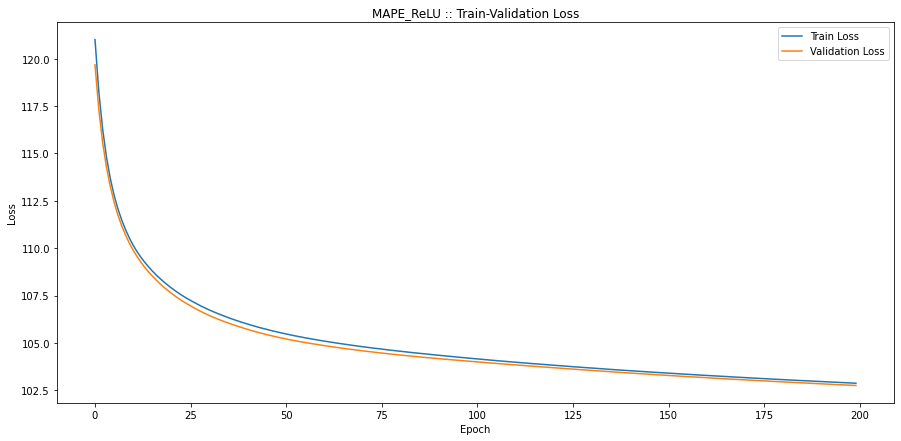

In [241]:
print("> ReLU")
model = MultiLayerPerceptron(loss_function=MAPELoss, learning_rate=1e-9, layers=[
    DenseLayer(9, 16, ReLU, name="Layer_0"),
    DenseLayer(16, 8, ReLU, name="Layer_1"),
    DenseLayer(8, 1, ReLU, name="Layer_2"),
    DenseLayer(1, 1, Identity, name="Identity")
])
train_result_dict = train(model=model, train_X=train_X, train_y=train_y, val_X=val_X, val_y=val_y, batch_size=32, n_epoch=200)
test_result_dict = test(model=model, test_X=test_X, test_y=test_y, batch_size=32)
plot_result(train_result_dict=train_result_dict, model_name="MAPE_ReLU", is_saved=True)

> Tanh
- Last Epoch
Training - Loss : 45.93668729597211
Validation - Loss : 46.008975840749656
Testing - Loss : 45.08469469699263


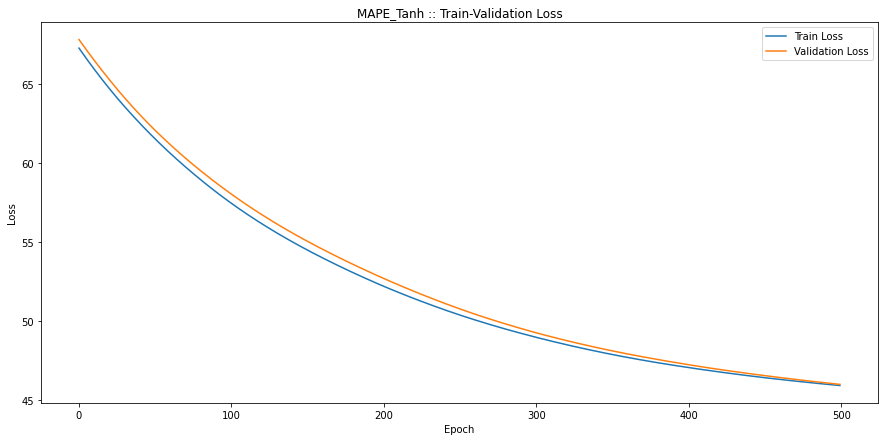

In [252]:
print("> Tanh")
model = MultiLayerPerceptron(loss_function=MAPELoss, learning_rate=1e-8, layers=[
    DenseLayer(9, 16, Tanh, name="Layer_0"),
    DenseLayer(16, 8, Tanh, name="Layer_1"),
    DenseLayer(8, 1, Tanh, name="Layer_2"),
    DenseLayer(1, 1, Identity, name="Identity")
])
train_result_dict = train(model=model, train_X=train_X, train_y=train_y, val_X=val_X, val_y=val_y, batch_size=32, n_epoch=500)
test_result_dict = test(model=model, test_X=test_X, test_y=test_y, batch_size=32)
plot_result(train_result_dict=train_result_dict, model_name="MAPE_Tanh", is_saved=True)

> Identity
- Last Epoch
Training - Loss : 107.8939829965348
Validation - Loss : 96.57086334569814
Testing - Loss : 95.03573834861766


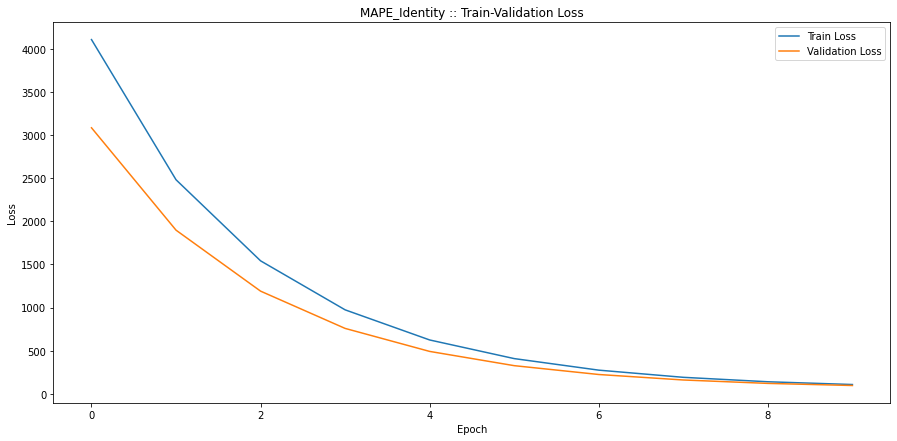

In [262]:
print("> Identity")
model = MultiLayerPerceptron(loss_function=MAPELoss, learning_rate=1e-11, layers=[
    DenseLayer(9, 16, Identity, name="Layer_0"),
    DenseLayer(16, 8, Identity, name="Layer_1"),
    DenseLayer(8, 1, Identity, name="Layer_2"),
    DenseLayer(1, 1, Identity, name="Identity")
])
train_result_dict = train(model=model, train_X=train_X, train_y=train_y, val_X=val_X, val_y=val_y, batch_size=16, n_epoch=10)
test_result_dict = test(model=model, test_X=test_X, test_y=test_y, batch_size=32)
plot_result(train_result_dict=train_result_dict, model_name="MAPE_Identity", is_saved=True)